# Analyze Small N Solutions

Check if our solutions for small N values match known optimal packings.

In [1]:
import pandas as pd
import numpy as np
from shapely import affinity
from shapely.geometry import Polygon
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# Tree geometry
TX = np.array([0, 0.125, 0.0625, 0.2, 0.1, 0.35, 0.075, 0.075, -0.075, -0.075, -0.35, -0.1, -0.2, -0.0625, -0.125])
TY = np.array([0.8, 0.5, 0.5, 0.25, 0.25, 0, 0, -0.2, -0.2, 0, 0, 0.25, 0.25, 0.5, 0.5])

def get_tree_polygon(cx, cy, angle_deg):
    angle_rad = np.radians(angle_deg)
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)
    x = TX * cos_a - TY * sin_a + cx
    y = TX * sin_a + TY * cos_a + cy
    return Polygon(zip(x, y))

def get_bounding_box_side(trees):
    all_poly = unary_union(trees)
    bounds = all_poly.bounds
    return max(bounds[2] - bounds[0], bounds[3] - bounds[1])

# Load current solution
df = pd.read_csv('/home/submission/submission.csv')
df['x'] = df['x'].str.strip('s').astype(float)
df['y'] = df['y'].str.strip('s').astype(float)
df['deg'] = df['deg'].str.strip('s').astype(float)
df['n'] = df['id'].str[:3].astype(int)

print("Current solutions for N=1-10:")
print("="*60)
for n in range(1, 11):
    group = df[df['n'] == n]
    trees = [get_tree_polygon(row['x'], row['y'], row['deg']) for _, row in group.iterrows()]
    side = get_bounding_box_side(trees)
    score = side**2 / n
    print(f"N={n}: side={side:.6f}, score={score:.6f}")
    for _, row in group.iterrows():
        print(f"  Tree: x={row['x']:.4f}, y={row['y']:.4f}, deg={row['deg']:.2f}")

Current solutions for N=1-10:
N=1: side=0.813173, score=0.661250
  Tree: x=44.2524, y=-32.5259, deg=45.00
N=2: side=0.949504, score=0.450779
  Tree: x=0.1541, y=-0.0385, deg=203.63
  Tree: x=-0.1541, y=-0.5615, deg=23.63
N=3: side=1.142031, score=0.434745
  Tree: x=1.1422, y=0.7775, deg=112.95
  Tree: x=1.2341, y=1.2760, deg=66.37
  Tree: x=0.6417, y=1.1805, deg=155.13
N=4: side=1.290806, score=0.416545
  Tree: x=-0.3247, y=0.1321, deg=156.37
  Tree: x=0.3154, y=0.1321, deg=156.37
  Tree: x=0.3247, y=-0.7321, deg=336.37
  Tree: x=-0.3154, y=-0.7321, deg=336.37
N=5: side=1.443692, score=0.416850
  Tree: x=-0.4606, y=0.1357, deg=293.63
  Tree: x=-0.4490, y=-0.7740, deg=23.63
  Tree: x=0.4606, y=-0.6641, deg=112.57
  Tree: x=0.0644, y=-0.4470, deg=66.36
  Tree: x=0.2697, y=0.1455, deg=12809.37
N=6: side=1.548438, score=0.399610
  Tree: x=-0.5059, y=0.0500, deg=293.63
  Tree: x=-0.1129, y=-0.4295, deg=338.87
  Tree: x=0.5028, y=-0.7322, deg=338.87
  Tree: x=-0.3985, y=-0.7986, deg=23.63
  

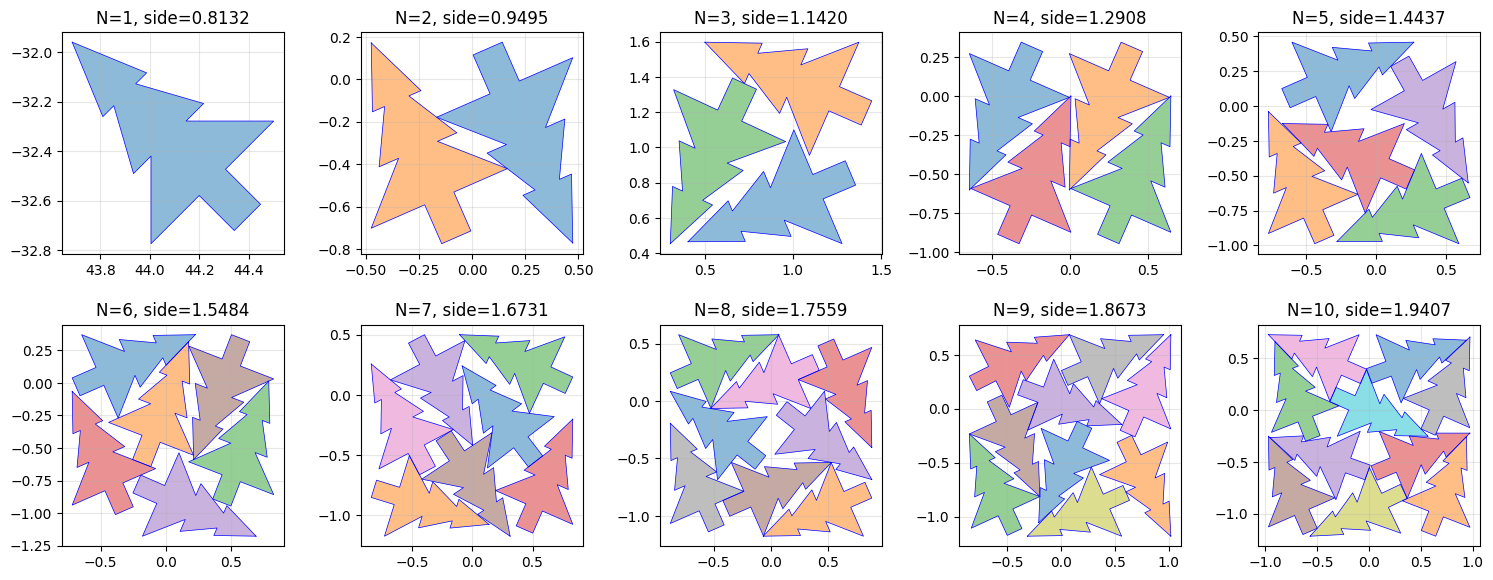

Saved visualization to small_n_visualization.png


In [2]:
# Visualize N=2 solution
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for idx, n in enumerate(range(1, 11)):
    ax = axes[idx // 5, idx % 5]
    group = df[df['n'] == n]
    
    for _, row in group.iterrows():
        tree = get_tree_polygon(row['x'], row['y'], row['deg'])
        x, y = tree.exterior.xy
        ax.fill(x, y, alpha=0.5)
        ax.plot(x, y, 'b-', linewidth=0.5)
    
    trees = [get_tree_polygon(row['x'], row['y'], row['deg']) for _, row in group.iterrows()]
    side = get_bounding_box_side(trees)
    
    ax.set_aspect('equal')
    ax.set_title(f'N={n}, side={side:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/code/experiments/005_random_restart/small_n_visualization.png', dpi=100)
plt.show()
print("Saved visualization to small_n_visualization.png")

In [3]:
# Calculate theoretical lower bounds
# For N=1, the optimal is a single tree at 45 degrees
# The bounding box of a tree at 45 degrees has side = sqrt(2) * max_dimension / 2

print("\nTheoretical analysis:")
print("="*60)

# Single tree at 45 degrees
tree_45 = get_tree_polygon(0, 0, 45)
bounds = tree_45.bounds
side_45 = max(bounds[2] - bounds[0], bounds[3] - bounds[1])
print(f"Single tree at 45 degrees: side = {side_45:.6f}")

# Single tree at 0 degrees
tree_0 = get_tree_polygon(0, 0, 0)
bounds = tree_0.bounds
side_0 = max(bounds[2] - bounds[0], bounds[3] - bounds[1])
print(f"Single tree at 0 degrees: side = {side_0:.6f}")

# The optimal angle for N=1 minimizes the bounding box
print("\nSearching for optimal angle for N=1...")
best_side = float('inf')
best_angle = 0
for angle in range(0, 360):
    tree = get_tree_polygon(0, 0, angle)
    bounds = tree.bounds
    side = max(bounds[2] - bounds[0], bounds[3] - bounds[1])
    if side < best_side:
        best_side = side
        best_angle = angle

print(f"Optimal angle for N=1: {best_angle} degrees, side = {best_side:.6f}")
print(f"Current N=1 side: {get_bounding_box_side([get_tree_polygon(df[df['n']==1].iloc[0]['x'], df[df['n']==1].iloc[0]['y'], df[df['n']==1].iloc[0]['deg'])]):.6f}")


Theoretical analysis:
Single tree at 45 degrees: side = 0.813173
Single tree at 0 degrees: side = 1.000000

Searching for optimal angle for N=1...
Optimal angle for N=1: 45 degrees, side = 0.813173
Current N=1 side: 0.813173
